## Capturing NAN by creating a new Feature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu', 'GarageType', 'SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

Text(0.5, 1.0, 'BEFORE IMPUTATION BsmtQual')

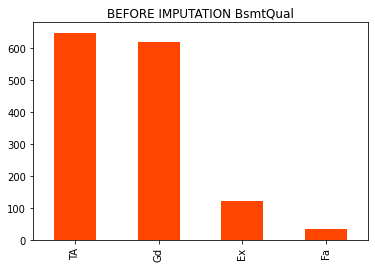

In [4]:
df['BsmtQual'].value_counts().plot.bar(color='orangered')
plt.title("BEFORE IMPUTATION BsmtQual")

In [5]:
def impute_nan(df,var):  
    df[var+'_missval_check'] = np.where(df[var].isnull(),1,0) #Creating New Feature
    frequent = df[var].mode()[0]   #For frequent category          
    df[var].fillna(frequent,inplace=True)#Replacing NaN values in var with FREQUENT

In [6]:
impute_nan(df,'BsmtQual')

In [7]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_missval_check
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [8]:
df.isnull().sum()

BsmtQual                    0
FireplaceQu               690
GarageType                 81
SalePrice                   0
BsmtQual_missval_check      0
dtype: int64

Text(0.5, 1.0, 'AFTER IMPUTATION BsmtQual')

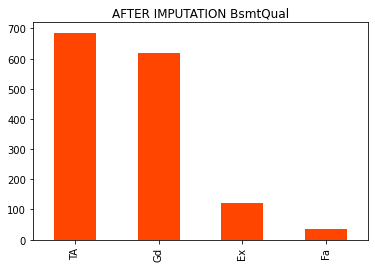

In [9]:
df['BsmtQual'].value_counts().plot.bar(color='orangered')
plt.title("AFTER IMPUTATION BsmtQual")

In [10]:
df.isnull().sum()

BsmtQual                    0
FireplaceQu               690
GarageType                 81
SalePrice                   0
BsmtQual_missval_check      0
dtype: int64

Text(0.5, 1.0, 'BEFORE IMPUTATION FireplaceQu')

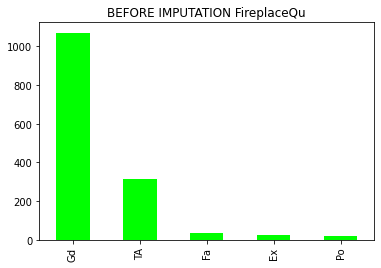

In [16]:
df['FireplaceQu'].value_counts().plot.bar(color='lime')
plt.title("BEFORE IMPUTATION FireplaceQu")

In [12]:
impute_nan(df,'FireplaceQu')

In [13]:
df


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_missval_check,FireplaceQu_missval_check
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


In [14]:
df.isnull().sum()

BsmtQual                      0
FireplaceQu                   0
GarageType                   81
SalePrice                     0
BsmtQual_missval_check        0
FireplaceQu_missval_check     0
dtype: int64

Text(0.5, 1.0, 'AFTER IMPUTATION FireplaceQu')

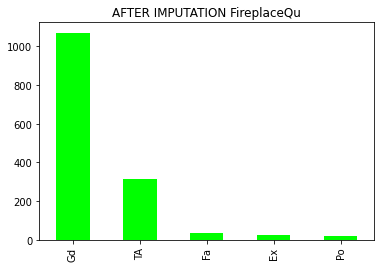

In [17]:
df['FireplaceQu'].value_counts().plot.bar(color='lime')
plt.title("AFTER IMPUTATION FireplaceQu")

## Advantages
1.Easy to Implement<br>
2.Captures the importance of missing value.

## Disadvantages
1.Creating Additional Features Which leads to Curse of Dimensionality.